In [1]:
import pandas as pd
import numpy as np
import os
import io
from sklearn.preprocessing import MinMaxScaler
import string
import re
from sklearn.preprocessing import LabelBinarizer
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
from IPython.display import Image

Using TensorFlow backend.


## Using only spaces and lower case characters in the corpus

In [ ]:
data = ''
for filename in os.listdir('../Data'):
    with open(f"../Data/{filename}", 'r', encoding = 'ascii', errors = 'ignore') as f:
        raw_text = f.read().replace('\n', ' ').lower()
        print(f"{filename} has length {len(raw_text)}")
        data = data + raw_text
    

data = re.sub(r"[^a-zA-Z]+", ' ', data) 

## Normalizing dataset

In [ ]:
X = []
m = ord('z')
for i in range(len(data)):
    X.append(ord(data[i])/m)


## Creating sequences using window size of 100

In [ ]:
w = 100
X_train = []
y_train = []
for i in range(len(X)-w):
    X_train.append(X[i:i+w-1])
    y_train.append(int(X[i+w-1]*m))

## Changing training data shape and converting output labes to one-hot-encoded format

In [ ]:
X_train = np.asarray(X_train)
X_train = np.reshape(X_train,[X_train.shape[0],X_train.shape[1],1])

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)

## Defining model architecture, loss function and optimizer

In [ ]:
model = Sequential()
model.add(LSTM(256, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')


## Checkpointing to save model weights after each epoch whilst monitoring loss

In [ ]:
filepath="text.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

## Training model for 30 epochs (Note: The model was trained on AWS EC2 using student educate credits). Since google colab did not allow speedy training for complex models 

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=64, callbacks=callbacks_list)

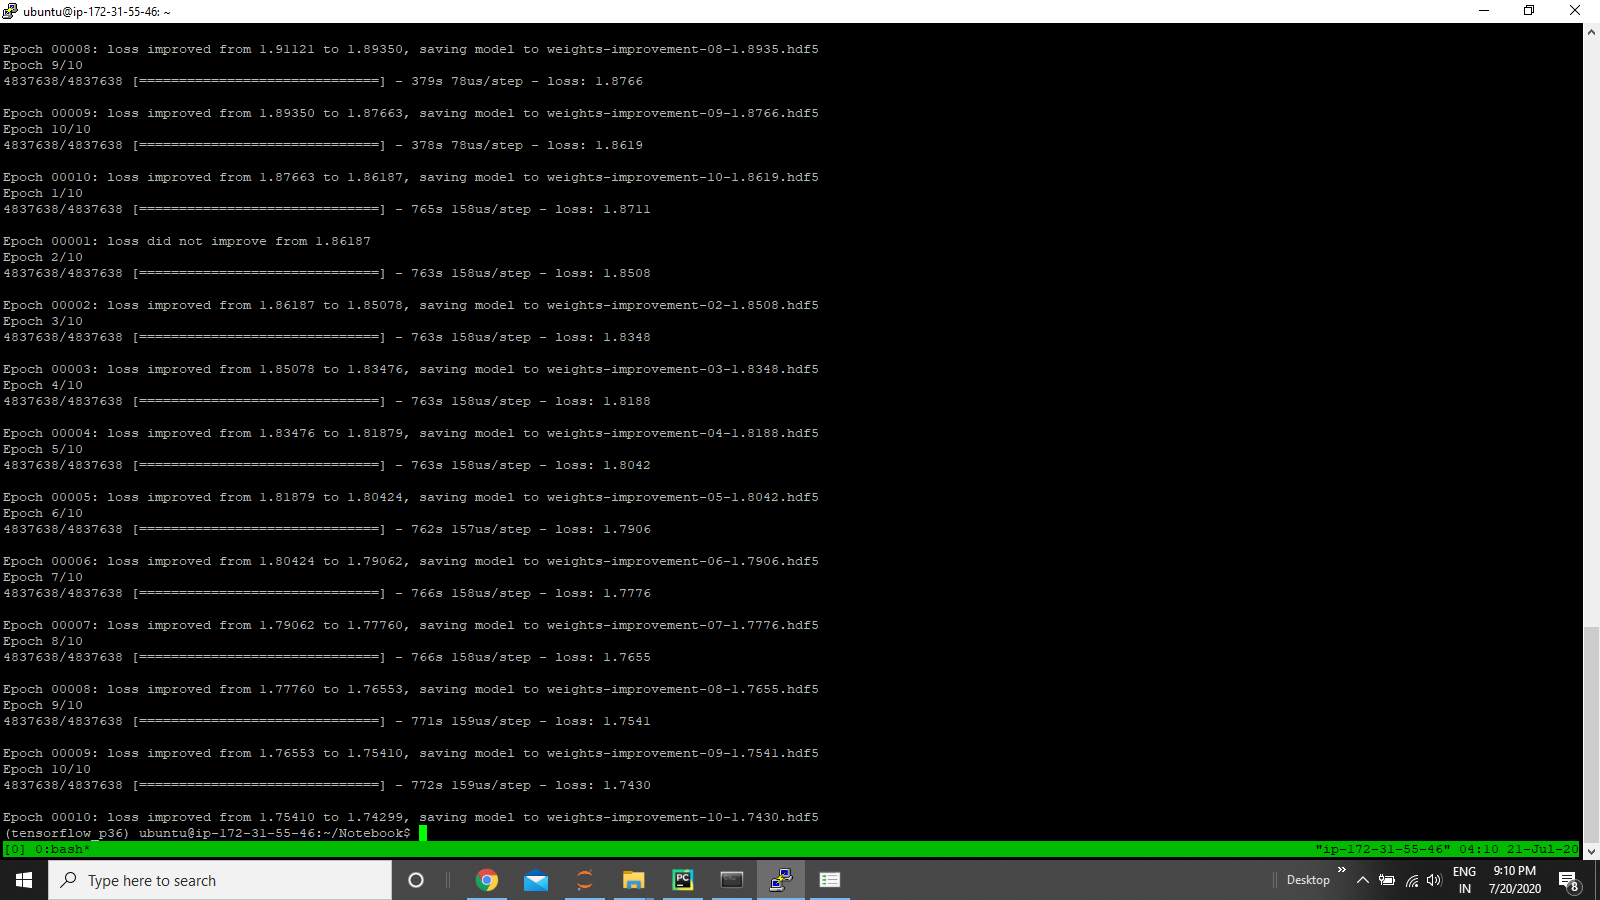

In [4]:
Image(filename="../Data/main_train.png")

## Loading saved model weights

In [ ]:
model.load_weights('text.hdf5')

## Testing model on sample text

In [ ]:
text = 'There are those who take mental phenomena naively, just as they would physical phenomena. This school of psychologists tends not to emphasize the object'.replace('\n', ' ').lower()
text = re.sub(r"[^a-zA-Z]+", ' ', text)


for i in range(1000):
    X_test = text[-99:]
    X_test = [ord(c)/122 for c in X_test]
    X_test = np.reshape(np.asarray(X_test),[99,1])
    X_test = np.reshape(X_test,[1,99,1])
    pred = model.predict(X_test)
    index = np.argmax(pred)
    m = lb.classes_[index]
    chars = chr(m)
    text += chars
print(text)


There are those who take mental phenomena naively just as they would physical phenomena This school of psychologists tends not to emphasize the objecti of thear ther and thenlles thellem and thenre in thear the cottrat and then ho sheloi the coas and thenleesed toetity thet an inserrenl of thear ther and thenlles thelleyidn then toerit in thear the coas asdsen as toecli toare then toerit in thear the coosrosisi oo the metter oo thesoler thellesidnl then toerit ie tays thetlen thenleeene toate then toerit then toerit in thear the coosrosisi oo the metter oo thesoler therllis thenlemedle to has heser therllis thenlemedle to hnr the cootrosisi the cootrosisi the cootrosisy of thean the coas asdsen as toecli toare then toerit in thear the coosrosisi oo thesoler whe peteriin oo thesolec ioserranlss therllis thenlemedle toate then toecls oo thesoler thellem and thenleeles io thear the coosrosisi oo thesoler whe peteriin of thean the coas asdsen as toecli toate then toerit in thear the coosro